# **Data Assassins** 


---
###**Spotify Classification Problem**

---





##Summary

>As streaming songs get ever-popular, music streaming service providers like Spotify, Apple Music deal with more enormous music data every day. This is where machine learning and deep learning come to play. Machine learning algorithms are already applied to produce recommended playlists based on listening preferences, and this is just the beginning of all that’s possible with artificial intelligence. Using the Spotify dataset, this assignment requires us to build a machine learning model to predict the song’s genre. Our first task was to load the dataset and explore its many quirks through data analyses and visualisations. We performed data exploration and data cleaning in our data analysis section of this notebook. Then we tested out several models to observe and understand how they work and improve them. Then we settled on our final model, a random forest classifier that provides us with the highest accuracy values. The accuracy score offered by our model is 0.4782, and the predictions made on Kaggle produced an accuracy score of 0.3241. we provide several suggestions, in the end, to improve our model and obtain a better accuracy score.





#Spotify Classification Project

>Importing all the required packages like pandas, matlab plot and numpy. 

In [64]:
#Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Dataset Analysis
>The Spotify dataset provided to train the model contains 453 songs on the song title, artist, top genre, the year it was released, beats per minute, energy, danceability, loudness, liveness, valence, duration, acoustics, speech and popularity.

###Getting The data
>Load the dataset to the program and use the head() function to observe the dataset.

In [65]:
#Load the Dataset
train_data = pd.read_csv(r"CS98XClassificationTrain.csv")
train_data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


>Count the number of rows in the dataset.We can observe that the dataset contains 453 songs.

In [66]:
#Display number of elements in each column of the dataset
train_data.count()

Id           453
title        453
artist       453
year         453
bpm          453
nrgy         453
dnce         453
dB           453
live         453
val          453
dur          453
acous        453
spch         453
pop          453
top genre    438
dtype: int64

>isnull() and sum() functions are used to count the null values in the dataset. There seems to be 15 null values in 'top genre'.

In [67]:
#Display number of null elements in each column of the dataset
train_data.isnull().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

###Dealing with Missing Values
>The missing values are replaced with most frequent genre in this dataset, which is adult standards. 

In [68]:
#Replcace the Null values with the most frequent genre
train_data['top genre'].replace('',np.NaN)
train_data['top genre'].fillna('adult standards')

#train_data = train_data.dropna(axis=0)


0         adult standards
1         adult standards
2         adult standards
3         adult standards
4               glam rock
              ...        
448       adult standards
449    brill building pop
450             dance pop
451              boy band
452            album rock
Name: top genre, Length: 453, dtype: object

###Encoding the categorical data
>To make 'top genre' predictions on the model, Label encoding needed to be performed since its a categorical data. This is done using the Label Encoder class and visualised using the head() function.

In [69]:
#Encode 'top genre' using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['top genre'] = le.fit_transform(train_data['top genre'])
train_data.head(10)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,1
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,86
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,1
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,1
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,68
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,80
6,7,No Time,The Guess Who,1971,128,48,48,-14,5,12,219,8,6,44,4
7,8,End Of The Road,Boyz II Men,1991,150,43,64,-9,6,53,351,7,2,71,24
8,9,Someone Elses Roses,Joan Regan,2019,100,14,29,-10,15,32,143,89,3,34,86
9,10,You Belong to My Heart,Timi Yuro,2013,108,39,46,-10,16,50,126,82,3,35,1


###Data Visualisation 
>Data visualisation is critical to understanding the dataset and detect any outliers, errors etc. This is done by creating a histogram plot, box plot and linear corelation matrix

####Histogram Plot
>The histogram is helpful to understand the distribution of the data as they are grouped into bins. We can observe that the live and speech features are highly skewed to one region. We will perform normalisation later in this code.

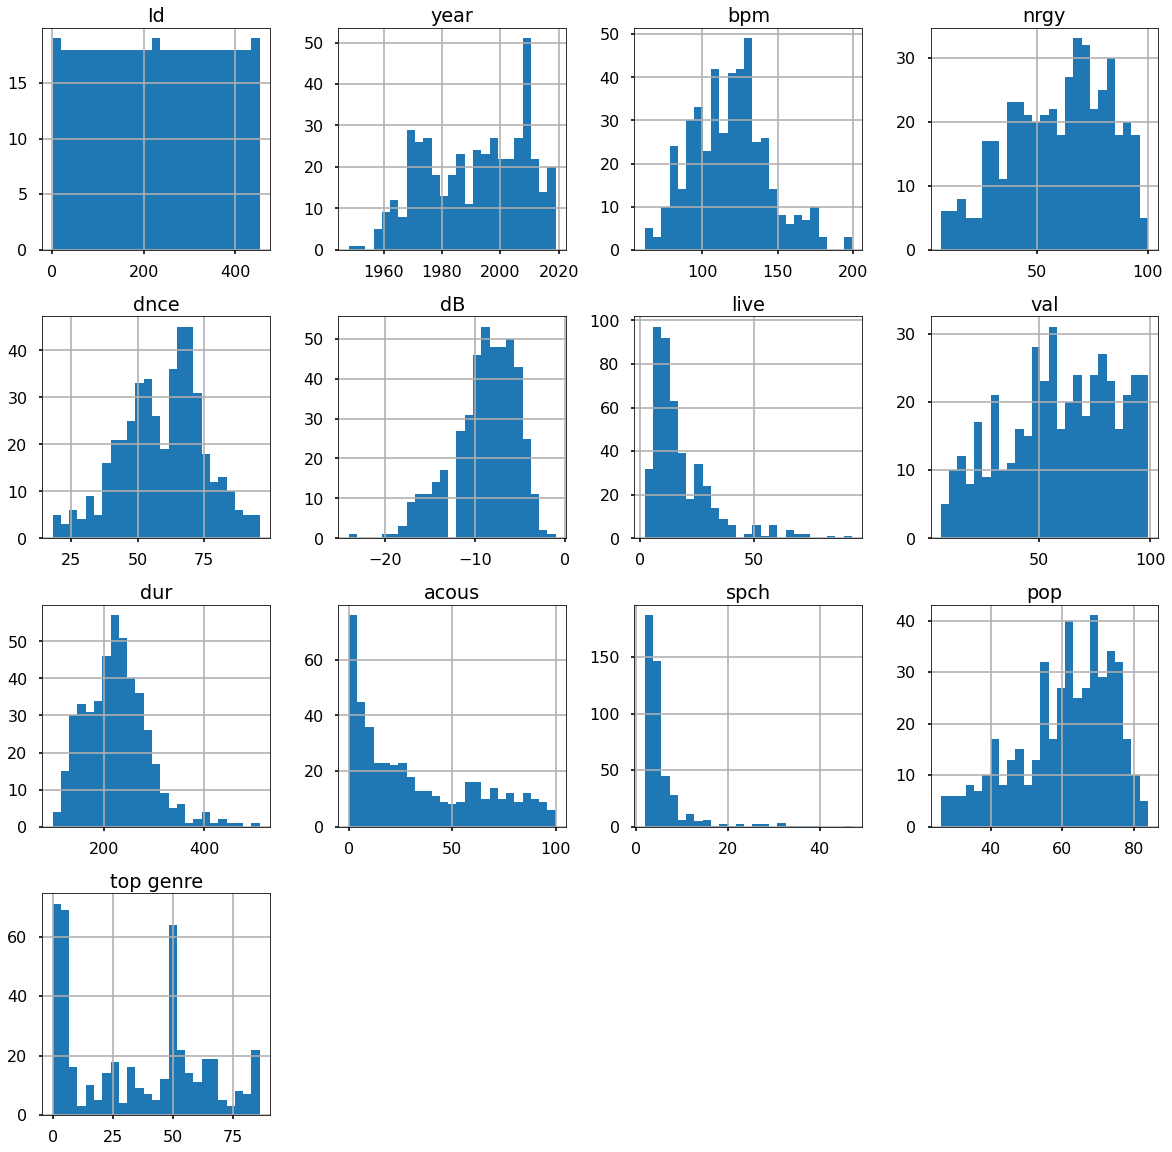

In [70]:
#Frequency distribution of elements in the dataset
import matplotlib.pyplot as plt
train_data.hist(bins=25, figsize=(20,20))
plt.show()

####Box Plot
>The Boxplot is used to observe outliers and how the data is distributed based on minimum, maximum and quartile calculations. The Seaborn package is used for creating the box plot.

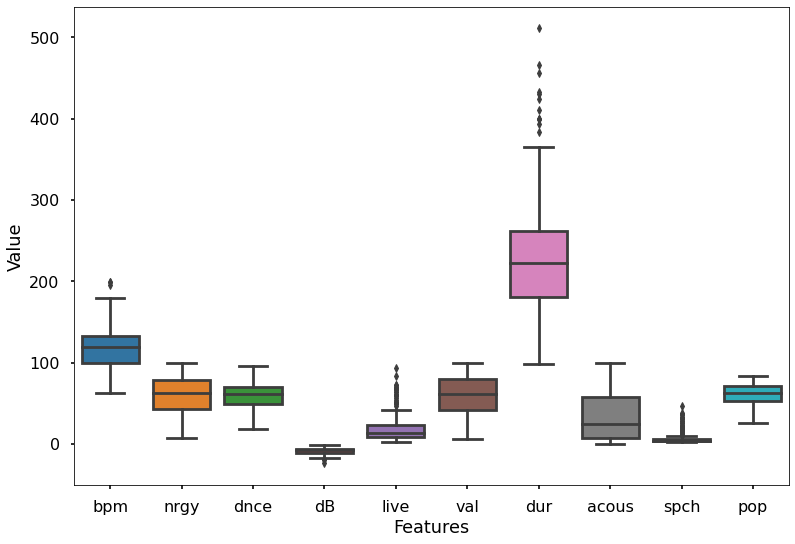

In [71]:
#Create a Box Plot of features in the dataset
import seaborn as sns 
import matplotlib.style as style
style.use('seaborn-poster')
sns.boxplot(data=train_data.drop(['Id','title', 'year','artist', 'top genre'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()


>>The distribution of features like speech and loudness seems to be very low. While the duration is the most widely distributed.


####Linear Correlation Matrix
>The Linear Correlation Matrix is used to demonstrate a linear correlation between the dataset's features. We can observe the correlation between all the features. This is visualised using a heat map. The green blocks show a high correlation.

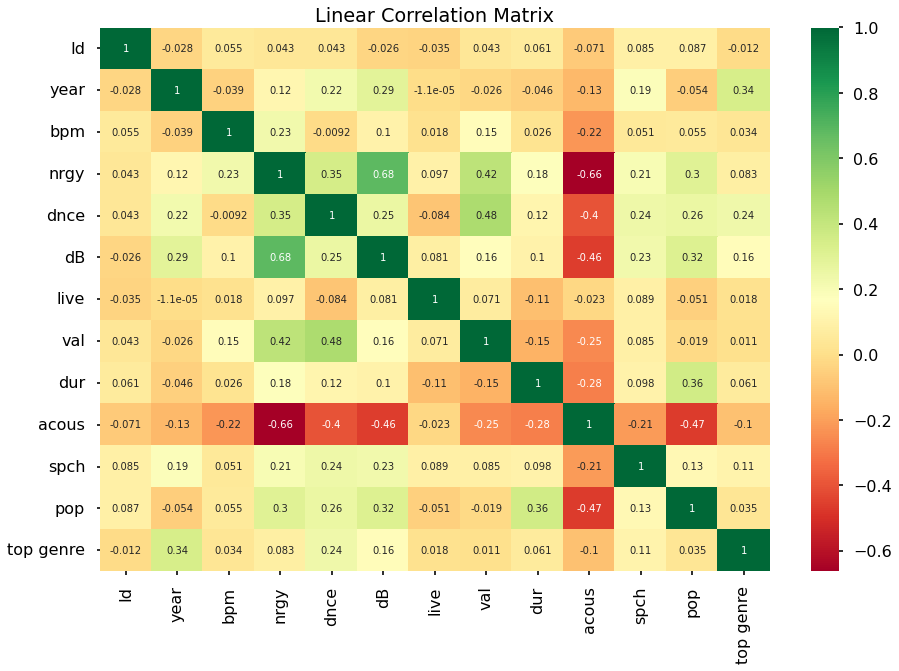

In [72]:
#Create a linear Corelation Matrix of the features in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True,cmap='RdYlGn')
plt.title('Linear Correlation Matrix')
plt.show()

>Some of the observations from the heatmap:


>>* Loudness and energy are highly correlated, which means the louder the song, the higher the energy.
*  Acoustics and energy seem to be highly inverse correlated, which means the higher the energy, the lower the acoustics.
*  Year and liveness seem to have a very low correlation.

###Outliers
>Outliers are instances with abnormal differnce to other values of the same group. This is identified from the get_outlier_counts() function and then the number of outliers are calulated.

In [73]:
from scipy import stats
import numpy as np
def get_outlier_counts(df, threshold):
    df = df.copy()
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    
    # Compare df z_scores to the threshold and return the count of outliers in each column
    return (z_score_df > threshold_z_score).sum(axis=0)



In [74]:

get_outlier_counts(train_data.drop(columns=['title','artist','Id']), 0.9999999)

year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         1
val          0
dur          0
acous        0
spch         4
pop          0
top genre    0
dtype: int64

>>The dataset seems to have 1 'live' outlier and 4 'spch' outliers. Since there seems to be a relatively small number of outliers compared to the rest of the dataset, removing them may not produce a significant difference in accuracy score.

##Data Pre-processing

###Preparing the data
>The data is then seperated to input features like beats per minute, energy, danceability, loudness, liveness, valence, duration, acustics, speechiness, popularity and targeted feature which here is top genre.

In [75]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Prepare the Data
X = train_data.drop(columns=['title','artist','top genre','Id'])
Y = train_data['top genre']

###Scaling The features of dataset
>The dataset is then scaled to normalise the data since they may vary widely. This is performed using Standard Scaler class.

In [76]:
#Scale the Data using Standard Scalar Function
scale = StandardScaler()
scaled_X=scale.fit_transform(X)

###Split & Train model function
>The train_model() function here performs three things, test/train split, train the model, predict and return the accuracy score values of the predictions. The train set and test set separation are done 90/10 per cent, respectively. We tested our models with 80/20 and 70/30 split, but the 90/10 split consistently produced a better accuracy.

In [77]:
#Define the function to train the models
def train_model(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=50, test_size=0.1)
  model.fit(x_train,y_train)
  #score = model.score(x_test,y_test)
  #print(score)
  prediction = model.predict(x_test)
  print("Accuracy Score :", accuracy_score(y_test,prediction)*100)

##Select and train the model

###Logistic Regression
>Logistic Regression is a statistical model which uses the logistic function to model a binary variable. This model is commonly used for binary classification and is the most basic of the classification models. The good thing about this model is that it's pretty easy to implement and is one of the most basic models out in the market. Also, it makes no assumptions in the distribution of classes in the feature space. Furthermore, it can also easily extend to a multi-class classifier when needed. Though the model is pretty good for prediction, it has its downsides. Sometimes, it may lead to overfitting, which is not optimal for the prediction. Also, through this model, it is tough to compute complex relationships.


In [78]:
#Logistic Regresion
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


one_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=10))
train_model(one_model,scaled_X,Y)

Accuracy Score : 39.130434782608695


>>Here, we have kept the maximum iteration to 1000 because we wanted to explore optimal predictions as much as possible. Also, we are setting the random state of the model so that our model sticks to one solution only. Also, we will be using OneVsRestClassifier because our problem is a multi-class problem and logistic regression only works on binary problems. We discarded this model because it is one of the basic models, and the accuracy score which is 39.13% is not as high as we expected it to be.

###Bagging Classifier
>It is one ensemble learning model that fits its base classifiers on random subsets of the original database and then collects their prediction to form the final prediction. In this assignment, we used DecisioncTree Classifier as our estimator for our bagging classifier; therefore, the Decision Tree classifier will predict on random subsets, and the bagging classifier collects the predictions to form a final result. The model is usually stable against the noise. It has an excellent capacity to predict noisy data decently while maintaining its compositions. Though it works great with classifiers, it needs many comparable classifiers for predicting the data.

In [79]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagg_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=100, # number of base estimators in ensemble
                            max_samples=0.5,  # 50% of samples taken from existing instances
                            max_features=1.0, # 100% of features are taken
                            bootstrap_features=False, # it represent samples taken with feature replacement
                            oob_score=True,
                            random_state=10)

#model = BaggingClassifier(DecisionTreeClassifier(random_state=0), n_estimators=100, bootstrap=False, random_state=0)
train_model(bagg_model,scaled_X,Y)


Accuracy Score : 39.130434782608695


>>Here, we performed hyperparameter tuning for n_estimators and max samples. The best accuracy score was produced when n_estimators was 100. This helps us achieve maximum predictions as possible. Also, max_samples were set to 0.5 as we want 50% of samples to be taken from existing instances. Max_features as 1.0 as 100% of features are required for our prediction and having bootstrap as false. Also, populating the value of random state so that we get the exact solution each time we run the model.

>>Bagging classifier model was also out of our list as it was not able to accuracy score (39.13%) as decent as we would expect it to be.

###Hard Voting
>Hard Voting is one of the ensemble learning models. Various individual models/classifiers are voted as per their performance, and then the highly voted model is chosen as the final model prediction. Here, in our assignment, we took RandomForest, Support Vector and Bagging Classifier as our estimators from which we will generate the best prediction out of the three classifiers. It is flexible in the selection of classifiers while predicting the data. Moreover, the model gives results based on other models predictions and thus, using different models in the same flow could lead us to more minor errors in prediction. But sometimes, this model can lead to overfitting the data and thus produce poor predictions.

In [80]:
#Hard Voting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimatorsList = [
                  ('rf', RandomForestClassifier(n_estimators=30, random_state=10)),
                  ('svc',SVC()),
                  ('bg',BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=100, # number of base estimators in ensemble
                            max_samples=0.5,  # 50% of samples taken from existing instances
                            max_features=1.0, # 100% of features are taken
                            bootstrap_features=False, # it represent samples taken with feature replacement
                            random_state=10))
                  ]

voting_model = VotingClassifier(estimators=estimatorsList,voting='hard')
train_model(voting_model,scaled_X, Y)


Accuracy Score : 43.47826086956522


>>After training the model, we obtained the final accuracy score of 43.48%. Which are better than previous models, but the random forest classifier and the support vector classifier perform better. In contrast, the bagging classifier consistently performs subpar, leading to an inefficient model. 

###Adaboost Classifier
>Adaboost classifier is one of the ensemble learning models in which it focuses on attention to the subsequent classifier to improve its errors. Here, we considered Decision Tree Classifier as our Adaboost base estimator and corrected its error in subsequent runs and gave the best result out of it. The model corrects the predicted errors of the predecessor, thus leading to a higher level of prediction with minimum chances of error in the data. But sometimes, the model could be overfitting the data or misclassifying them.

In [81]:
#AdaBoost Classifer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500, algorithm="SAMME.R", learning_rate=0.1)
train_model(ada_model,scaled_X, Y)

Accuracy Score : 41.30434782608695


>>After performing hyperparameter tuning, we found n_estimators as 500 to be producing the best accuracy score. This is the optimal value because the performance reduces when the n_estimator value is high. Also, we have used Samme Algorithm for this model for our prediction and learning rate as 0.1.

>>Adaboost performed pretty decent compared to other models in our list with an accuracy score of 41.304% but wasn't the best model to lend us the best accuracy because of possible underfitting of the data.

###Our Final Model

**RandomForest Classifier :-**

>It is the ensemble of Decision tree classifiers that are trained via bagging. It is an effective technique and is used widely for classification problems. The model works based on the feature importance approach, and the features which are highly correlated with the target will have a higher portion of weight in predicting the data. It also reduces the overfitting of the data, thus leading to a higher quality prediction with minimum error chances. Moreover, it is one of the most potent models used for data analytics. Since the model does an excellent job for classification but not for regression, it may not be flexible to various applications.


In [82]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth=5, max_leaf_nodes=16, n_jobs=-1)

train_model(rf_model,scaled_X,Y)

#Feature Importance
feature_importances = rf_model.feature_importances_
print("Feature importances:\n{}".format(feature_importances))

Accuracy Score : 47.82608695652174
Feature importances:
[0.18069722 0.06206212 0.11441432 0.07889825 0.06033395 0.04232445
 0.04795374 0.1412093  0.10277457 0.0400741  0.12925798]


>> We immediately got a better accuracy score than the previous models when we trained the model. Our mean prediction score was 45.56%. We performed hyperparameter tuning on n_estimators and max depth parameters to improve our model. We finally landed with n_estimators=500 and max_depth=5 producing the highest accuracy. As we can see, our RandomForest classifier performs the best among all the models present in this assignment, with a mean accuracy score of 47.82%. We also utilised the feature importance function that random forest contains to see which features influence our target. In this dataset, beats per minute, duration and speech have the most substantial influence on our target. We could use the most critical features to train our model to obtain better accuracy on a larger dataset.

>>We picked Random Forest Classifier as our model because it is powerful and performs well when the dataset is small. Since the splitting is randomised, the subset of features while looking for the best feature produces predictions with higher bias but lower variance leading to a better model. After training our data with this model, we reached a new high in our accuracy score of around 47%, which was pretty good compared to all the previous models we trained. Therefore, we chose the Random Forest Classifier as our final model, and we found this model to predict our data better. It does not produce a better accuracy because the dataset is relatively small and contains just a few instances for many 'top genre' labels. 

>> Our model performs better when training with an accuracy score of 0.478, but when we uploaded our predictions to Kaggle, our score was 0.32, which is lower than our score obtained while training. This is possibly due to the overfitting of the training data. Our model does not produce the best solution, but we can significantly improve it by further optimising our model. 


## Conclusion
>We can further improve our model by using highly correlated features with our target (top genre). This can be done when the dataset is more extensive and the instances in the genre are distributed evenly. We can perform more data analysis and cleaning to get a better accuracy score. Another suggestion is to use the Extra Trees Classifier to select the subset of features based on a random threshold rather than looking for the best feature. The Extra Trees model can be much faster than our current model. In the end, We learned to perform end to end machine learning, and in future, we would like to explore neural networks as a possible solution to accomplish this classification task.  

##Appendix: Loading the dataset to test file

In [83]:
# Load the test file
test = pd.read_csv("CS98XClassificationTest.csv")
test_copy = test.copy() # Create copy file to retain the original dataset
test_copy.drop(['title','artist','Id'], axis=1, inplace=True)
test_scaled = scale.fit_transform(test_copy) # fit the test_copy
prediction=le.inverse_transform(rf_model.predict(test_scaled))
test['top genre'] = prediction
#Note: CS98XClassificationTest.csv has to be added for each test run
test.to_csv("CS98XClassificationTest.csv") # load the final predicted pop into original test dataset
test.head(5)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72,dance pop
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59,adult standards
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76,adult standards
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50,dance pop
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44,adult standards
